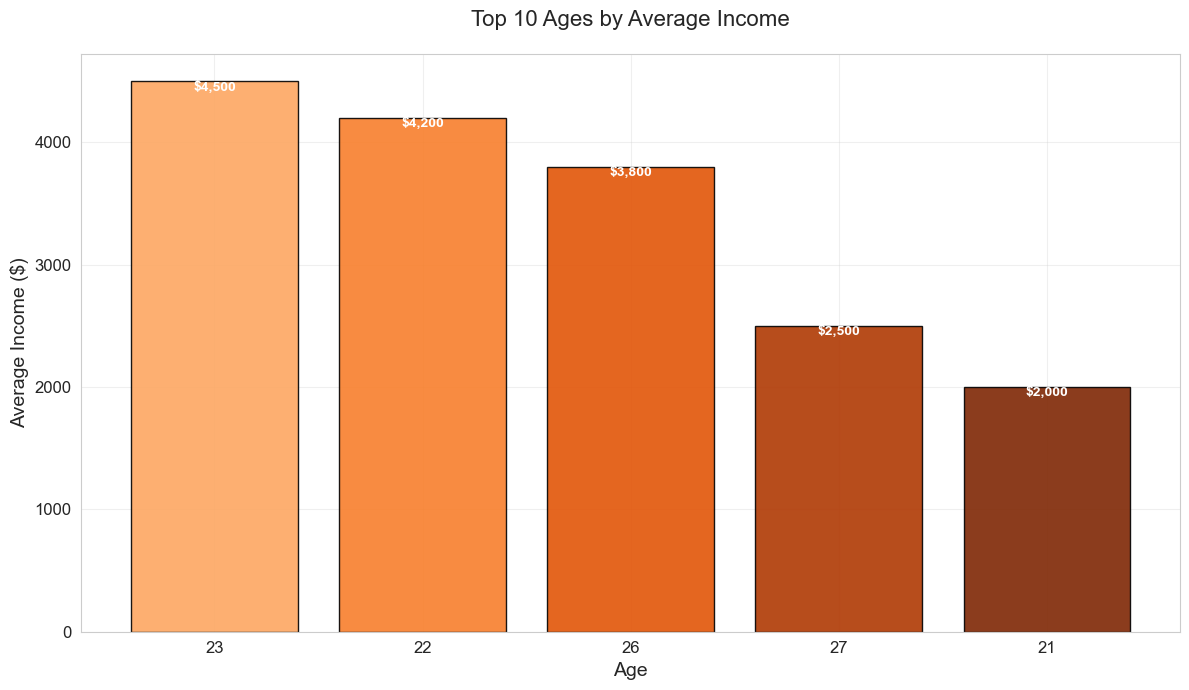

<Figure size 1400x800 with 0 Axes>

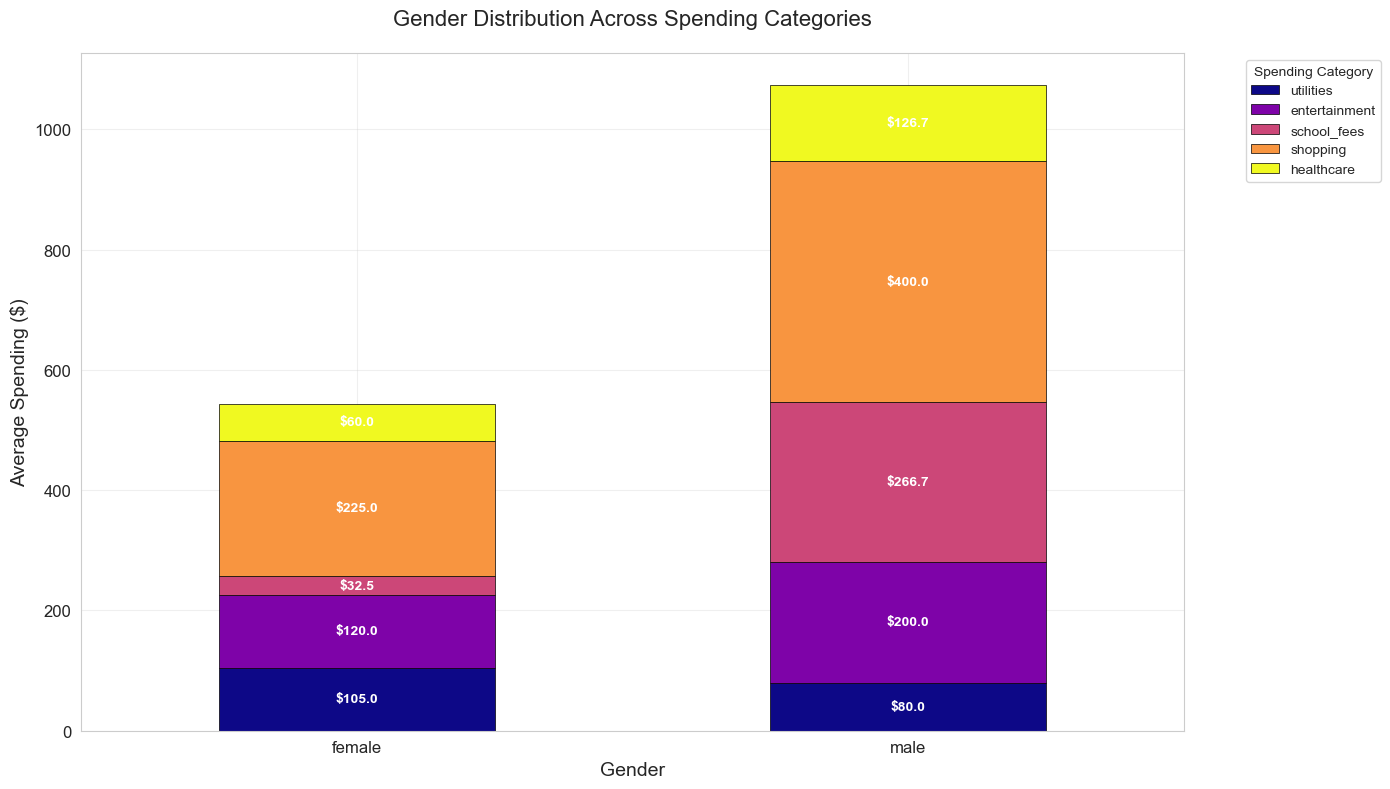

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Needed for color gradient

# Set professional style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Load data from CSV
df = pd.read_csv('user_data.csv')

# Calculate metrics
expense_cols = ['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']
df['total_spending'] = df[expense_cols].sum(axis=1)
df['net_income'] = df['income'] - df['total_spending']

# =================================================================
# Visualization 1: Top Ages by Income (Orange Gradient)
# =================================================================
plt.figure(figsize=(12, 7))
top_ages = (df.groupby('age')['income']
            .mean()
            .sort_values(ascending=False)
            .head(10))

# Create orange gradient-colored bars
colors = plt.cm.Oranges(np.linspace(0.4, 1, len(top_ages)))  # Orange gradient from light to dark
bars = plt.bar(top_ages.index.astype(str), top_ages, color=colors, edgecolor='black', alpha=0.9)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height-100,
             f'${height:,.0f}',
             ha='center', va='bottom', color='white', fontweight='bold')

plt.title('Top 10 Ages by Average Income', fontsize=16, pad=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Income ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('top_ages_income.png', dpi=300, bbox_inches='tight')
plt.show()

# =================================================================
# Visualization 2: Gender Spending Distribution (Enhanced)
# =================================================================
plt.figure(figsize=(14, 8))

# Prepare data
gender_spending = df.groupby('gender')[expense_cols].mean()

# Create stacked bars with improved colors
ax = gender_spending.plot(kind='bar', stacked=True, 
                         colormap='plasma',
                         edgecolor='black',
                         linewidth=0.5,
                         figsize=(14, 8))

# Customize appearance
plt.title('Gender Distribution Across Spending Categories', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Spending ($)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add precise value labels
for container in ax.containers:
    ax.bar_label(container, 
                label_type='center', 
                fmt='$%.1f', 
                color='white',
                fontsize=10,
                fontweight='bold')

# Improve legend
plt.legend(title='Spending Category', 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left',
          frameon=True)

plt.tight_layout()
plt.savefig('gender_spending_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


# Save processed data
df.to_csv('processed_user_data.csv', index=False)